

# Machine Learning Battle Royale #1
Welcome to the first Machine Learning NR Programming Battle Royale #1!!! (AKA: NR Programming Challenge # XX)

<img src="files/ML_meme.jpeg">


 

<b>Objective:</b> Train your neural network to recognize handwritten numbers to maximize the networks accuracy.

<b>Input:</b>  Labeled handwritten number data from the mnist database. The input is in the form of 28x28 pixel gray scale picture of labeled data. 

<b>Output:</b> Trained network

If you are new to neural networks the code below will walk you through the basics of and get your network training in no time.  If you already know what you are doing, go straight to the skeleton python notebook found here: <b>XXX</b>

As always, happy coding!

<img src = "files/logo.png" width=300>

## Machine Learning: The (Super) Basics

In this programming challenge, we will train a classifier neural network to recognize handwritten numbers.  

If you would like a much better explanation of AI feel free to reach out to Matt, Joe, or our resident AI TA, Sean. 


### 1. The Basic Building Block: Neuron

The "neuron" is the basic building block of a neural network.  A <b>neuron</b>, as shown in the image, below consists of input numbers ($x_1,x_2,...,x_n$), weights ($w_1,w_2,...,w_n$), bias ($b$), and a non-linear activation function that produces an output ($y$).

<img src="files/neuron.png" width="400">

In the image above the weights are contained withing the red boxes, the bias is contained within the green box, and the non-linear activation function is within the yellow box. 

A few things are happening here. First, each input is multiplied by a weight:

\begin{equation*}
x_1 \rightarrow x_1 * w_1
\end{equation*}

\begin{equation*}
x_2 \rightarrow x_2 * w_2
\end{equation*}

Next, the weighted inputs are added to the bias (b):

\begin{equation*}
(x_1*w_1)+(x_2*w_2)+b
\end{equation*}

Finally, the sum is passed through an activation function:

\begin{equation*}
y=f((x_1*w_1)+(x_2*w_2)+b)
\end{equation*}

Activations functions are generally non-linear and serve to map the input values to the output values.  

Common activation functions include the <b>sigmoid</b> function:

<img src="files/sigmoid.png" width="300">

You may be asking yourself, why do we even bother to use an activation function?  First, the sigmoid function is nonlinear.  This allows our neural network to learn non-linear functions.  For my fellow EE's out there, we are no longer bound to the ever present Linear Time Invariant system assumption (well, at least the linear part anyway)! 

Second, the system is bound to negative (0,1) as opposed (-inf,inf) with linear functions.  This means we do not have to worry about the output exploding into something unreasonable.  And for classifier examples (i.e. identifying if a picture is of a Cat or Not a Cat) the 0,1 output range serves as a good differentiator. 

There are other commonly used activation functions such as Rectified Linear Units (ReLu) and Hyperbolic Tangent (Tanh) that each have different strengths and weaknesses that will not be covered here. 



### 2. Lets Build a Network: Combining Neurons

While a single neuron allows us to "learn" some tasks, the real power comes when the single neurons are connected together to form a <b>neural network</b>.  A simple neural network is shown below:

<img src="files/simple_network.png" width="400">

A network consists of:
- <b>Input Layer</b>: The input layer is the data ($x_1,x_2,...,x_n$)
- <b>Hidden Layers</b>: Consists of n-layers of interconnected neurons. 
- <b>Output Layer</b>: The final layer of the network

The simple network shown in the image above consists of a input layer, consisting of two input values which consists of a single integer of floating point number. A single hidden layer made of two neurons and an output layer consisting of one neuron. 

<b>Feedforward Example</b>

We've created a simple network, now lets see what happens when we pass input values into out network.  Passing inputs to get an output is known as <b>feedforward</b>. 

$x_1$ and $x_2$ will be the inputs.  $h_1$, $h_2$ represent the output of our hidden layers, and $o_1$ represents the output of the network. 

Starting off, lets assume all neurons have the same weights $W=[0.5,1]$, the same bias $b=0$, and use the sigmoid activation function.  We will pass the input $X=[2,3]$ and step through to the output:


\begin{align*}
h_1=h_2&=sigmoid(W \cdot X+b)\\
     &=sigmoid\big((0.5*2)+(1*3)+0\big)\\
     &=sigmoid(4)\\
     &=0.9820\\
     \\
o_1&=sigmoid(W \cdot [h_1,h_2]+b)\\
     &=sigmoid\big((0.5*0.9820)+(1*0.9820)+0\big)\\
     &=sigmoid(1.473)\\
     &=0.8135
\end{align*}




### 3. Lets Get Training!

We have made our network and calculated an output, but we have not done anything to make our network "intelligent".  To make out network have intelligence we need to train (update the neurons weights and biases) for the specific task.  For classifiers, such as our handwriting recognition task, networks train on input data with classified (labeled) outputs.  

The network feedforwards the input and calculates outputs  for each sample.  The feedforwarded outputs for all the samples are compared to the classified data using a loss function.  The weights for each neuron are then updated to minimize the loss using a back propagation algorithm to update the weights and minimize the loss.  Congrats, we have made our network smarter!

We will through a simple example for training a neural network and then jump into coding (this is the ML Battle Royale #1 after all).

<b>Example</b>

Lets assume you want to train your network to predict whether someone is an NR engineer.  Through your research, you identified two valuable data points at differentiating someone as an NR Engineer: someones competitiveness on a scale from 0 to 10, and number of board games they own.  You then forked over large sums of money to collect and clean the following exhaustive data set:

<img src="files/engineer_table.png" width="400">

And used your research funds to develop the following model:

<img src="files/engineer_network.png" width="400">

In your model NR Engineer is represented by a 1 and non-NR engineer is represented by a 0.  

<b>Loss</b>

As mentioned above, in order to train out network we need a measure of how good our function this.  In neural networks this is defined as the loss. 

One function is the <b>mean squared error</b> (MSE) loss:

\begin{equation}
MSE = \frac{1}{m} \sum_{i=1}^{m}(y_{actual} - y_{pred})^2
\end{equation}

Where:
- $\boldsymbol{m}$ is the number of samples
- y the variable being predicted, which is NR Engineer
- $y_{actual}$ is actual value of the prediction variable
- $y_{pred}$ is the predicted value of the variable 


<b>Loss Example </b>

Lets put the loss function to the test on our NR Engineer data.  For our first training run, lets say the network predicts 0 (Non-NR Engineer).  This would lead to the following loss calculation:

<img src="files/engineer_mse.png" width="300">

\begin{equation}
MSE = \frac{1}{4}(1 + 0 + 0 + 1) = 0.5
\end{equation}

<b>Minimize the loss</b>

We calculated the loss for the our prediction, now we must update weights and biases values to minimize the loss.

We minimize the loss through <b>backpropagation</b>.  Backpropagation works by computing the gradient of the loss function for a single input-output combination.  Using the chain rule, the gradient can be computed for each weight ($w_1 - w_6$) and bias ($b_1 - b_3$) in the network. The weights are then updated based on a factor of the gradient called the <b>learning rate</b>.  
This process is then repeated over and over until our network is meeting the desired performance.  If the network is reaching a plateau where it is making little to no progress no matter how much time you spend training it, it is time to evaluate either changing the model (size, learning rate, etc.), or gather more data. 

I will not go into the math here, but a quick google search will bring up plenty of derivations.

I've skipped over a lot of details, but this description, and the codewalk through below should be enough to get you started on the programing challenge.  And as always, do not be shy about reaching out for help! 

Heavily Used Sources:

Victor Zhou, <https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9>

Wikipedia
\
\
\
\
\
\
\
\
\



# ML Challenge #1 Code Walkthrough

As mentioned above the code below will walk you through making a hand writing tool network.

<b> Grayscale Images </b>

Before we begin lets review what goes into a grayscale image.  In a 8-bit grayscale image each pixel is represented with an integer between 0-255, where 0 is black and 255 is white.  The values in between represent varying shades of grade, from dark to light. 

An example grayscale image with the pixel values overlay is shown here:

<img src = "files/grayscale_example.png">


<b> Feed image into neural network </b>

Now that we know a grayscale is nothing more than an array of integers from 0 -255, it is time to pass the information into our neural network.

The first step is to unwrap the  mnist dataset (which if you remember from above is a 28x28 pixel image) into a single column.  The result is a 784x1 array as follows:

<img src = "files/unwrap.png" width=400>

Each row of the unwrapped array corresponds to a single pixel of the input image.

The unwrapped array is then input into our neural network as shown here:

<img src="files/image_ann.png" width=400>

where:

- input layer: input for each pixel (1-784)
- hidden layers: 2 hidden layers of size 2.  The number and hidden layers size for your training example are up to you.
- output layer: Applies the softmax function to the output layer that is made up with 10 neurons; one for each digit, 0-9.

<b> Softmax function</b> normalizes the probability of the output layer such that each component will be in the interval (0,1) and all of the components will add up to 1.  This allows to interpret the output as probabilities and make predictions based on the highest probabilities. 


<b>Libraries</b> used in this challenge:
- <b>numpy</b>: The fundamental package for scientific computing with Python. It includes functions for N-dimensional array objec, linear algebra, and random number capabilities.

- <b>tensorflow</b>: An open-source software symbolic math library developed by Google that can be used generate neural networks.

- <b>keras</b>: An open-source python library that is capable or running on top of tensorflow.  Keras allows you to define a nerual network at high-level of abstractions than tensorflow. 

In [19]:
# Import Required Libratries
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

<usepackage>
<b>One Hot Encoding</b>
To train our softmax output layer, we need to transform the labels, integers 0-9, into one hot encoding. One-hot is a group of bits where each bit represents a number.  0-9 are represented by an array length of 10.  Some examples of one hot encoding are shown here:


\begin{equation*}
0 = \begin{bmatrix} 1\\0\\0\\0\\0\\0\\0\\0\\0\\0 \end{bmatrix};\quad
2 = \begin{bmatrix} 0\\0\\1\\0\\0\\0\\0\\0\\0\\0 \end{bmatrix};\quad
9 = \begin{bmatrix} 0\\0\\0\\0\\0\\0\\0\\0\\0\\1 \end{bmatrix}\quad
\end{equation*}

The next function will one-hot encode our labels into an $mx10$ array and unwrap our input data into $mx784$ array, where m represents the number of images.

In [20]:
############################################################
# function: create_onehot_classifier(y)
#   Creates a one hot encoded array between (0,9) 
#
# input: mx1 array of intergers between (0,9), 
#        where m represented the number of training examples
#
# output: mx10 array of one's hot encoded values
############################################################


def create_onehot_classifier(y):
    
    #Create and array zeros array in the shape of the final output
    arr_train = np.zeros((y.shape[0],10),dtype=int) 
    
    i=0 # Inititalize the index
    
    # Interate through each example and write that example to 
    #   the zeros array generated earlier 
    for val in y:
        temp_arr = np.zeros(10)
        temp_arr[0] = 1
        temp_arr = np.roll(temp_arr, val)
        arr_train[i,:] = temp_arr
        i=i+1
    return arr_train

The next block will load and format the training and test set:
- <b>Training Set</b>:  The training set is the data used to train our model.
- <b>Test Set</b>: The test set is the data used to evaluate the performance of th model. 

The reason we split the training and test sets is because we want to ensure our model is performing well on new data and helps evaluate if our model is <b>overfitting</b>.  Overfitting data occur when the network corresponds too closes to the training set and does not perform well on other datasets. 




In [3]:
# This block loads the data, and places it in the
#    correct format for training

#Load mnist data
path = 'mnist.npz'
with np.load(path) as data:
  x_train_read = data['x_train']
  y_train_read = data['y_train']
  x_test_read = data['x_test']
  y_test_read = data['y_test']

# Print the shape of data of orginial data
print("x_train shape: ", x_train_read.shape)
print("y_train shape: ", y_train_read.shape)
print("x_test shape: ", x_test_read.shape)
print("y_test shape: ", y_test_read.shape)

x_train = x_train_read.reshape(x_train_read.shape[0],-1)
x_test = x_test_read.reshape(x_test_read.shape[0],-1)

y_train = create_onehot_classifier(y_train_read)
y_test = create_onehot_classifier(y_test_read)

print("\nFormatted x_train shape:",x_train.shape)
print("Formatted y_train shape:",y_train.shape)
print("Formatted x_test shape:",x_test.shape)
print("Formatted y_test shape:",y_test.shape)


x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)

Formatted x_train shape: (60000, 784)
Formatted y_train shape: (60000, 10)
Formatted x_test shape: (10000, 784)
Formatted y_test shape: (10000, 10)


The foundation of any AI application is the data provided to the algorithm.  The cell below will load a random sample of the data.

Rerun the cell multiple times to get familiar with the data. 

Number:  7
y_train[16272] = [0 0 0 0 0 0 0 1 0 0]
x_train[16272]:


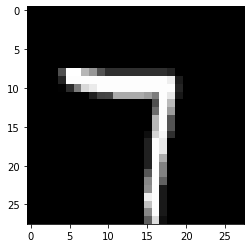

In [4]:
# Explore the Data
# Rerun this cell to load additonal examples

# Integer between 0-59,999
index = np.random.randint(0,59999)
plt.imshow(x_train_read[index], cmap='gray')
str_yout = 'y_train['+str(index)+'] ='
str_xout = 'x_train['+str(index)+']:'
print("Number: ", y_train_read[index])
print(str_yout,y_train[index])
print(str_xout)

Now it is finally time to make your neural network!  This block will use keras to define and load your model. 

As discussed above.  The default model has 2 hidden layers each made of 2 neurons and a softmax output layer of size 10. 

The number of hidden layers and number of neurons can be adjusted to train and improve model performance.  You will need to iterate to find which combination provides the best accuracy and balance the amount of time it takes to train the model (In general, larger model takes more computational power to train). 

In [28]:
# THis block contains the function that 

def create_model():
   
    # Hyper Parameters
    # Tune these to change perfromance
    learning_rate = 0.0005
    hidden_layer1_size = 2 # number of neurons in hidden layer 1
    hidden_layer2_size = 2 # number of neurons in hidden layer 2
    
    # Block defining neural network 
    # Add/Delete layers to change performance 
    model = keras.Sequential([
        keras.layers.Dense(hidden_layer1_size, activation=tf.nn.relu, input_shape = (784,)),
        keras.layers.Dense(hidden_layer2_size, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    ])

    # By default will use:
    #   Adams Optimizer with learning rate 0.0005
    #   Mean Square Error Loss Function
    #   Metrics, which does is only provided for information and not used 
    #      in training, is model accuracy on traing set in decimal form. 
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss=tf.keras.losses.mean_squared_error,
                  metrics=['accuracy'])
    return model

# Load the neural network 
model = create_model()

We've created the model, now it is to train the model. 

We will use the .fit method to fit the model based on x_train and y_train input. 

The methods include:

- <b>epochs</b> is the number of times the model will run through all m (60000) training examples.

- batch-size is the size of the <b>mini-batch</b>, or number of samples per loss calculation that is then used to update the network weights.  Mini-batches speed up the learning of your network rather than calculating the loss and updating the weights for all 60,000 samples at once. You can use any batch-size that you want, but choosing a factor of 2 will improve computation speed. 



In [29]:
# Train the model using the .fit command

model.fit(x_train, y_train, epochs = 100, batch_size = 32,initial_epoch=0)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0828 - accuracy: 0.1983
Epoch 2/100
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0710 - accuracy: 0.3225
Epoch 3/100
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0597 - accuracy: 0.4536
Epoch 4/100
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0572 - accuracy: 0.4909
Epoch 5/100
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0558 - accuracy: 0.5006
Epoch 6/100
   32/60000 [..............................] - ETA: 5s - loss: 0.0584 - accuracy: 0.4062

KeyboardInterrupt: 

In [23]:
# Evaluate your model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test,verbose = 'False')
print("Test Accuracy = ",  test_acc)

Test Accuracy =  0.3777


Number:            6
Model Prediction:  0
x_train[16272]:


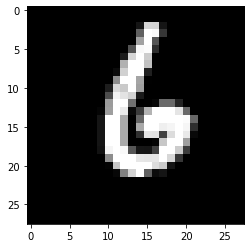

In [24]:
# Let Look at how the model perfromed
# Rerun the model to figure which test cases your model
#    predicted right and which ones it predicted wrong
# 
# Evaluating which data your model does well on which ones
#   need improvemt can focus your data collection and traing efforts 

index = np.random.randint(0,x_train.shape[0])
plt.imshow(x_train_read[index], cmap='gray')

xin = x_train[index].reshape(-1,1)
xin = xin.T
arr_predict = model.predict(xin,verbose = 'False')
# transform array to number
result = np.argmax(arr_predict)

print("Number:           ", y_train_read[index])
print("Model Prediction: ", result)
print(str_xout)

In [ ]:
# Run this block to save your model
# This file will be the submission to the programming challenge
model.save('NAME_model.h5')
